In [48]:
import numpy as np
np.random.seed(42)
#
x_train = np.random.randint(2, size=(5, 10)).astype(np.float32)

y_train = np.random.randint(100, size=(5, 1)).astype(np.float32)
y_train

array([[46.],
       [61.],
       [50.],
       [54.],
       [63.]], dtype=float32)

In [77]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize, params):
        super(linearRegression, self).__init__()
        self.params = params
        self.model = torch.nn.Linear(inputSize, outputSize)
        self.optimizer = torch.optim.SGD(self.parameters(), lr=params['lr'])
        self.criterion = torch.nn.MSELoss()

    def forward(self, x):
        out = self.model(x)
        return out

    def train(self, x, y):
        epochs = self.params['epochs']

        for epoch in range(epochs):
            inputs = Variable(torch.from_numpy(x))
            targets = Variable(torch.from_numpy(y))
            self.optimizer.zero_grad()
            outputs = self.forward(inputs)
            loss = criterion(outputs, targets)
            #print('epoch {}, loss {}'.format(epoch, loss.data[0]))
            print(epoch)
            print(loss)
            loss.backward()
            self.optimizer.step()

In [78]:
inputDim = x_train.shape[1] 
outputDim = 1
learningRate = 0.01
epochs = 1500
params = {'lr': 0.01, 'epochs': 1500}

model = linearRegression(inputDim, outputDim, params)

model.train(x_train, y_train)

0
tensor(3026.3706, grad_fn=<MseLossBackward>)
1
tensor(2522.6819, grad_fn=<MseLossBackward>)
2
tensor(2110.5220, grad_fn=<MseLossBackward>)
3
tensor(1773.1572, grad_fn=<MseLossBackward>)
4
tensor(1496.9143, grad_fn=<MseLossBackward>)
5
tensor(1270.6208, grad_fn=<MseLossBackward>)
6
tensor(1085.1482, grad_fn=<MseLossBackward>)
7
tensor(933.0368, grad_fn=<MseLossBackward>)
8
tensor(808.1920, grad_fn=<MseLossBackward>)
9
tensor(705.6332, grad_fn=<MseLossBackward>)
10
tensor(621.2911, grad_fn=<MseLossBackward>)
11
tensor(551.8405, grad_fn=<MseLossBackward>)
12
tensor(494.5644, grad_fn=<MseLossBackward>)
13
tensor(447.2424, grad_fn=<MseLossBackward>)
14
tensor(408.0604, grad_fn=<MseLossBackward>)
15
tensor(375.5361, grad_fn=<MseLossBackward>)
16
tensor(348.4580, grad_fn=<MseLossBackward>)
17
tensor(325.8360, grad_fn=<MseLossBackward>)
18
tensor(306.8615, grad_fn=<MseLossBackward>)
19
tensor(290.8734, grad_fn=<MseLossBackward>)
20
tensor(277.3312, grad_fn=<MseLossBackward>)
21
tensor(265.79

In [79]:
def _clean_weights(Wb):
    for v in range(0, len(Wb)-2, 2):
        Wb[v][abs(Wb[v]) <= 1e-8] = 0
        Wb[v+1][abs(Wb[v+1]) <= 1e-8] = 0
        zero_rows = np.where(np.logical_and((Wb[v] == 0).all(axis=0), Wb[v+1] == 0))[0]
        if len(zero_rows) > 0:
            logging.debug('Clean Weights (rows) %s', zero_rows)
            Wb[v] = np.delete(Wb[v], zero_rows, axis=1)
            Wb[v+1] = np.delete(Wb[v+1], zero_rows)
            Wb[v+2] = np.delete(Wb[v+2], zero_rows, axis=0)
    return(Wb)

def _get_model_weights(model): # torch
    nnmodel = model.model
    weights = []
    for params in nnmodel.parameters():
        weights.append(params.detach().cpu().numpy().T)        
    return weights



In [100]:
W = _get_model_weights(model)
Wb = _clean_weights(W)

#create a list of weights and intercept
coef = Wb[0].flatten().tolist()
intercept = Wb[1].flatten().tolist()
print(coef, intercept)

[-14.05063533782959, 13.419620513916016, -0.9574124813079834, -0.8536351919174194, 13.991691589355469, 2.41796875, 14.143380165100098, 1.110815167427063, 4.052565574645996, 2.476624011993408] [27.692903518676758]


[[33.98551 ]
 [73.80148 ]
 [43.45491 ]
 [77.509186]
 [65.31266 ]]


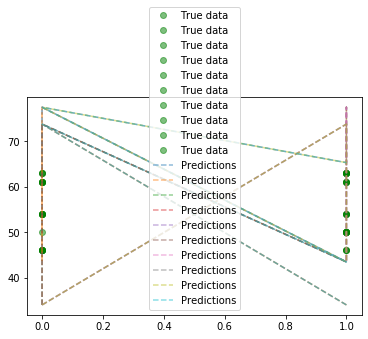

In [42]:
import matplotlib.pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_test).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_test))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()